## Wrangling Project

### Import libraries for the project

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import default_timer as timer

## Data wrangling

###  Gethering Data

   ###  1. Reading 1st file - twitter archive

In [2]:
# read csv file
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Reading  2st file - Image Prediction File

In [3]:
# download image prediction programmatically using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', mode= 'wb') as file:
    file.write(r.content)

In [4]:
#loading file image prediction
image_pred_df = pd.read_csv('image_predictions.tsv', sep='\t')

### 3. Reading  3rd file

#### * Importing data from twitter using API

In [5]:
# create a twitter API object
import tweepy

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# get tweets with specific id 
exp_tweet = api.get_status(twitter_archive_df.tweet_id[100], tweet_mode = 'extended')
content = exp_tweet._json
content


{'created_at': 'Thu Jun 08 14:20:41 +0000 2017',
 'id': 872820683541237760,
 'id_str': '872820683541237760',
 'full_text': 'Here are my favorite #dogsatpollingstations \nMost voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 https://t.co/17FVMl4VZ5',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'text': 'dogsatpollingstations',
    'indices': [21, 43]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 872820673743376386,
    'id_str': '872820673743376386',
    'indices': [141, 164],
    'media_url': 'http://pbs.twimg.com/media/DBzhx0MXUAI5spb.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DBzhx0MXUAI5spb.jpg',
    'url': 'https://t.co/17FVMl4VZ5',
    'display_url': 'pic.twitter.com/17FVMl4VZ5',
    'expanded_url': 'https://twitter.com/dog_rates/status/872820683541237760/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Rate limit reached. Sleeping for: 630


Success
699: 786363235746385920
Success
700: 786286427768250368
Success
701: 786233965241827333
Success
702: 786051337297522688
Success
703: 786036967502913536
Success
704: 785927819176054784
Success
705: 785872687017132033
Success
706: 785639753186217984
Success
707: 785533386513321988
Success
708: 785515384317313025
Success
709: 785264754247995392
Success
710: 785170936622350336
Success
711: 784826020293709826
Success
712: 784517518371221505
Success
713: 784431430411685888
Success
714: 784183165795655680
Success
715: 784057939640352768
Success
716: 783839966405230592
Success
717: 783821107061198850
Success
718: 783695101801398276
Success
719: 783466772167098368
Success
720: 783391753726550016
Success
721: 783347506784731136
Success
722: 783334639985389568
Success
723: 783085703974514689
Success
724: 782969140009107456
Success
725: 782747134529531904
Success
726: 782722598790725632
Success
727: 782598640137187329
Success
728: 782305867769217024
Success
729: 782021823840026624
Success


Success
956: 751598357617971201
Success
957: 751583847268179968
Success
958: 751538714308972544
Success
959: 751456908746354688
Success
960: 751251247299190784
Success
961: 751205363882532864
Success
962: 751132876104687617
Success
963: 750868782890057730
Success
964: 750719632563142656
Success
965: 750506206503038976
Success
966: 750429297815552001
Success
967: 750383411068534784
Success
968: 750381685133418496
Success
969: 750147208377409536
Success
970: 750132105863102464
Success
971: 750117059602808832
Success
972: 750101899009982464
Success
973: 750086836815486976
Success
974: 750071704093859840
Success
975: 750056684286914561
Success
976: 750041628174217216
Success
977: 750026558547456000
Success
978: 750011400160841729
Success
979: 749996283729883136
Success
980: 749981277374128128
Success
981: 749774190421639168
Success
982: 749417653287129088
Success
983: 749403093750648834
Success
984: 749395845976588288
Success
985: 749317047558017024
Success
986: 749075273010798592
Success


Success
1206: 715928423106027520
Success
1207: 715758151270801409
Success
1208: 715733265223708672
Success
1209: 715704790270025728
Success
1210: 715696743237730304
Success
1211: 715680795826982913
Success
1212: 715360349751484417
Success
1213: 715342466308784130
Success
1214: 715220193576927233
Success
1215: 715200624753819648
Success
1216: 715009755312439296
Success
1217: 714982300363173890
Success
1218: 714962719905021952
Success
1219: 714957620017307648
Success
1220: 714631576617938945
Success
1221: 714606013974974464
Success
1222: 714485234495041536
Success
1223: 714258258790387713
Success
1224: 714251586676113411
Success
1225: 714214115368108032
Success
1226: 714141408463036416
Success
1227: 713919462244790272
Success
1228: 713909862279876608
Success
1229: 713900603437621249
Success
1230: 713761197720473600
Success
1231: 713411074226274305
Success
1232: 713177543487135744
Success
1233: 713175907180089344
Success
1234: 712809025985978368
Success
1235: 712717840512598017
Success
12

Rate limit reached. Sleeping for: 678


Success
1249: 711363825979756544
Success
1250: 711306686208872448
Success
1251: 711008018775851008
Success
1252: 710997087345876993
Success
1253: 710844581445812225
Success
1254: 710833117892898816
Success
1255: 710658690886586372
Success
1256: 710609963652087808
Success
1257: 710588934686908417
Success
1258: 710296729921429505
Success
1259: 710283270106132480
Success
1260: 710272297844797440
Success
1261: 710269109699739648
Success
1262: 710153181850935296
Success
1263: 710140971284037632
Success
1264: 710117014656950272
Success
1265: 709918798883774466
Success
1266: 709901256215666688
Success
1267: 709852847387627521
Success
1268: 709566166965075968
Success
1269: 709556954897764353
Success
1270: 709519240576036864
Success
1271: 709449600415961088
Success
1272: 709409458133323776
Success
1273: 709225125749587968
Success
1274: 709207347839836162
Success
1275: 709198395643068416
Success
1276: 709179584944730112
Success
1277: 709158332880297985
Success
1278: 709042156699303936
Success
12

Success
1498: 692423280028966913
Success
1499: 692417313023332352
Success
1500: 692187005137076224
Success
1501: 692158366030913536
Success
1502: 692142790915014657
Success
1503: 692041934689402880
Success
1504: 692017291282812928
Success
1505: 691820333922455552
Success
1506: 691793053716221953
Success
1507: 691756958957883396
Success
1508: 691675652215414786
Success
1509: 691483041324204033
Success
1510: 691459709405118465
Success
1511: 691444869282295808
Success
1512: 691416866452082688
Success
1513: 691321916024623104
Success
1514: 691096613310316544
Success
1515: 691090071332753408
Success
1516: 690989312272396288
Success
1517: 690959652130045952
Success
1518: 690938899477221376
Success
1519: 690932576555528194
Success
1520: 690735892932222976
Success
1521: 690728923253055490
Success
1522: 690690673629138944
Success
1523: 690649993829576704
Success
1524: 690607260360429569
Success
1525: 690597161306841088
Success
1526: 690400367696297985
Success
1527: 690374419777196032
Success
15

Success
1747: 679132435750195208
Success
1748: 679111216690831360
Success
1749: 679062614270468097
Success
1750: 679047485189439488
Success
1751: 679001094530465792
Success
1752: 678991772295516161
Success
1753: 678969228704284672
Success
1754: 678800283649069056
Success
1755: 678798276842360832
Success
1756: 678774928607469569
Success
1757: 678767140346941444
Success
1758: 678764513869611008
Success
1759: 678755239630127104
Success
1760: 678740035362037760
Success
1761: 678708137298427904
Success
1762: 678675843183484930
Success
1763: 678643457146150913
Success
1764: 678446151570427904
Success
1765: 678424312106393600
Success
1766: 678410210315247616
Success
1767: 678399652199309312
Success
1768: 678396796259975168
Success
1769: 678389028614488064
Success
1770: 678380236862578688
Success
1771: 678341075375947776
Success
1772: 678334497360859136
Success
1773: 678278586130948096
Success
1774: 678255464182861824
Success
1775: 678023323247357953
Success
1776: 678021115718029313
Success
17

Success
1996: 672594978741354496
Success
1997: 672591762242805761
Success
1998: 672591271085670400
Success
1999: 672538107540070400
Success
2000: 672523490734551040
Success
2001: 672488522314567680
Success
2002: 672482722825261057
Success
2003: 672481316919734272
Success
2004: 672475084225949696
Success
2005: 672466075045466113
Success
2006: 672272411274932228
Success
2007: 672267570918129665
Success
2008: 672264251789176834
Success
2009: 672256522047614977
Success
2010: 672254177670729728
Success
2011: 672248013293752320
Success
2012: 672245253877968896
Success
2013: 672239279297454080
Success
2014: 672231046314901505
Success
2015: 672222792075620352
Success
2016: 672205392827572224
Success
2017: 672169685991993344
Success
2018: 672160042234327040
Success
2019: 672139350159835138
Success
2020: 672125275208069120
Success
2021: 672095186491711488
Success
2022: 672082170312290304
Success
2023: 672068090318987265
Success
2024: 671896809300709376
Success
2025: 671891728106971137
Success
20

Rate limit reached. Sleeping for: 545


Success
2149: 669749430875258880
Success
2150: 669684865554620416
Success
2151: 669683899023405056
Success
2152: 669682095984410625
Success
2153: 669680153564442624
Success
2154: 669661792646373376
Success
2155: 669625907762618368
Success
2156: 669603084620980224
Success
2157: 669597912108789760
Success
2158: 669583744538451968
Success
2159: 669573570759163904
Success
2160: 669571471778410496
Success
2161: 669567591774625800
Success
2162: 669564461267722241
Success
2163: 669393256313184256
Success
2164: 669375718304980992
Success
2165: 669371483794317312
Success
2166: 669367896104181761
Success
2167: 669363888236994561
Success
2168: 669359674819481600
Success
2169: 669354382627049472
Success
2170: 669353438988365824
Success
2171: 669351434509529089
Success
2172: 669328503091937280
Success
2173: 669327207240699904
Success
2174: 669324657376567296
Success
2175: 669216679721873412
Success
2176: 669214165781868544
Success
2177: 669203728096960512
Success
2178: 669037058363662336
Success
21

In [8]:
#Read line by lines to creat dataframe
json_file = []

tweet_file = open('tweet_json.txt', 'r')
for line in tweet_file:
    try:
        tweet = json.loads(line)
        json_file.append(tweet)
    except:
        continue
            
tweet_file.close()
tweet_json = pd.DataFrame(json_file)

In [9]:
#Creat an Additional Data with id, retweet_count and fovourite_count
data_api_df = tweet_json[['id','retweet_count', 'favorite_count']].copy()


### Assessing data

### 1. Assessing twitter_archive file

In [10]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
# view the shape of the dataset
twitter_archive_df.shape

(2356, 17)

In [12]:
#check for duplicates
sum(twitter_archive_df.duplicated())

0

In [13]:
# check unique entries 
twitter_archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
#view data of first file
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# view missing value count for each feature in twitter archive
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### 2. Assessing 2nd file - Image Prediction

In [16]:
#see the information for the file
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_pred_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
#view the shape of the dataset
image_pred_df.shape

(2075, 12)

In [19]:
#check for duplicates
sum(image_pred_df.duplicated())

0

In [20]:
# check unique entries 
image_pred_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [21]:
# view missing value count for each feature in image prediction
image_pred_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
#check preditive image data
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### * 3. Assesing 3rd file - API data

In [23]:
data_api_df.head(15)

,id,retweet_count,favorite_count
0,892420643555336193,7331,34922
1,892177421306343426,5473,30239
2,891815181378084864,3620,22758
3,891689557279858688,7513,38165
4,891327558926688256,8088,36438
5,891087950875897856,2709,18380
6,890971913173991426,1752,10695
7,890729181411237888,16442,58795
8,890609185150312448,3763,25319
9,890240255349198849,6360,28873


In [24]:
# view the shape of the dataset
data_api_df.shape

(2331, 3)

In [25]:
#checking the info of tweet dataframe
data_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [26]:
#check for duplicates
sum(data_api_df.duplicated())

0

In [27]:
#view data of third file
data_api_df.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2580.967825,7290.702274
std,6.823170e+16,4365.229807,11323.757250
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,524.000000,1262.500000
50%,7.182469e+17,1204.000000,3160.000000
75%,7.986692e+17,2986.000000,8911.000000
max,8.924206e+17,74055.000000,150015.000000


## Observation

### 1. Quality issues

1. Twitter_archive file:
 - in_reply_to_status_id is an almost empty column and should be deleted <br>
 - in_reply_to_user_id is an almost empty column and should be deleted<br>
 - retweeted_status_timestamp column is almost empty and should be deleted
 - retweet_status_id and retweet_status_user_id are also almost empty columns and should be deleted
 - Some rows in twitter_archived in the name column have wrong names and are in lower case(such as "a, an, the .etc")
 - The timestamp column is string and should be in datetime format
 - Assign 10 to rating_denominator column value in 1st file "twitter archive"
 - Delete rows which don't have expand urls.

2. Image Prediction file
 - Remove 66 repeated url rows in 2nd file
 - the breeds in columns p1,p2,p3 should be all in capital letters
 - In 2nd file image prediction the column img_num is unnecessary
3.Twitter API
  - rename id to tweet_id

### 2. Tidy

1. Twitter_archive file:
  - Merge the 4 different columns (doggo, floofer, pupper, puppo)  into one column named "dog_stage". Because the all 4 columns are relative to the same variable that indentifies the dog stage.
2. Image Prediction file:
   - Merge the 3 different columns (p1_dog, p2_dog, p3_dog).
   - Drop the unnecessary columns(p1_dog, p2_dog,p3_dog))

## Cleaning data

###  *  Create a copy from original file

In [28]:
copy_twitter_archive_df =twitter_archive_df.copy()
copy_image_pred_df = image_pred_df.copy()
copy_data_api_df = data_api_df.copy()

In [29]:
copy_twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### * Cleaning Isues 

### - Quality Issue 1 ( twitter_archive file)
**Define** <br>
  Remove retweets selecting only rows that have null values in retweet related columns make the same also for in_reply columns <br>
 <br>
**Code**

In [30]:
# in_reply_to_status_id column
copy_twitter_archive_df = copy_twitter_archive_df[copy_twitter_archive_df.in_reply_to_status_id.isnull()]
# deleting column in_reply_to_status_id because it is almo empty
copy_twitter_archive_df = copy_twitter_archive_df.drop(columns= "in_reply_to_status_id", axis=1)

In [31]:
# in_reply_to_user_id column
copy_twitter_archive_df = copy_twitter_archive_df[copy_twitter_archive_df.in_reply_to_user_id.isnull()]
# deleting column in_reply_to_user_id because it is almo empty
copy_twitter_archive_df = copy_twitter_archive_df.drop(columns= "in_reply_to_user_id", axis=1)

In [32]:
# retweeted_status_timestamp column
copy_twitter_archive_df = copy_twitter_archive_df[copy_twitter_archive_df.retweeted_status_timestamp.isnull()]
# deleting column retweeted_status_timestamp because it is almo empty
copy_twitter_archive_df = copy_twitter_archive_df.drop(columns= "retweeted_status_timestamp", axis=1)

In [33]:
# retweeted_status_id column
copy_twitter_archive_df  = copy_twitter_archive_df[copy_twitter_archive_df.retweeted_status_id.isnull()]
# deleting column retweeted_status_id because it is almo empty
copy_twitter_archive_df = copy_twitter_archive_df.drop(columns= "retweeted_status_id", axis=1)

In [34]:
# retweeted_status_user_id 
copy_twitter_archive_df = copy_twitter_archive_df[copy_twitter_archive_df.retweeted_status_user_id.isnull()]
# deleting column retweeted_status_id because it is almo empty
copy_twitter_archive_df = copy_twitter_archive_df.drop(columns= "retweeted_status_user_id", axis=1)

#### Test

In [35]:
copy_twitter_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### - Quality Issue 2 (twitter_archive file)
**Define** <br>
 Some rows in twitter_archived in the name column have wrong names started with lower case(such as "a, an, the.. etc"). Fix these names with the right once <br>
 <br>
 **Code**

In [36]:
#the name started with lower case
copy_twitter_archive_df[copy_twitter_archive_df.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [37]:
wrong_names = copy_twitter_archive_df[copy_twitter_archive_df.name.str.islower()==True]['name'].unique()

In [38]:
#replace all unreasonable names with None
for name in wrong_names:
    copy_twitter_archive_df.name.replace(name, 'None', inplace=True)

#### Test

In [39]:
copy_twitter_archive_df[copy_twitter_archive_df.name.str.islower()==True]['name'].unique()

array([], dtype=object)

### - Quality Issue 3 (twitter_archive file)
**Define** <br>
 The timestamp column is string and should be changed to datetime format <br>
 <br>
 **Code**


In [40]:
# convert the 'timestamp' column to datetime format
copy_twitter_archive_df['timestamp']= pd.to_datetime(copy_twitter_archive_df['timestamp'])

#### Test

In [41]:
# Check the format of 'timestamp' column
copy_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### - Quality Issue 4 (twitter_archive file)
**Define** <br>
 Assign 10 to rating_denominator column value in 1st file "twitter archive"<br>
 <br>
 **Code**

In [42]:
#assign 10 to rating_denominator
copy_twitter_archive_df.rating_denominator= copy_twitter_archive_df['rating_denominator']=10

#### Test

In [43]:
#count values in rating_denominator column
copy_twitter_archive_df.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

### - Quality Issue 5 (twitter_archive file)
**Define** <br>
Delete rows which don't have expand urls. <br>

 **Code**

In [44]:
copy_twitter_archive_df.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         3
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [45]:
#Delete rows whichdon't have expand url
copy_twitter_archive_df.dropna(subset=['expanded_urls'],inplace=True)

#### Test

In [46]:
copy_twitter_archive_df.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### - Quality Issue 6 (image_predictions file)
**Define** <br>
 Remove 66 repeated url rows in image_predictions file <br>
 <br>
 **Code**

In [47]:
copy_image_pred_df = copy_image_pred_df.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [48]:
copy_image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [49]:
#check for duplicates
sum(copy_image_pred_df['jpg_url'].duplicated())

0

### - Quality Issue 7 (image_predictions file)
**Define** <br>
 The breeds in columns p1,p2,p3 should be all in capital letters <br>
 <br>
 **Code**

In [50]:
#the breeds started with lower case - p1
copy_image_pred_df[copy_image_pred_df.p1.str.islower()==True]['p1'].unique()

array(['redbone', 'miniature_pinscher', 'box_turtle', 'chow',
       'shopping_cart', 'miniature_poodle', 'golden_retriever', 'pug',
       'bloodhound', 'hen', 'desktop_computer', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'black-and-tan_coonhound', 'coho', 'toy_terrier', 'llama',
       'curly-coated_retriever', 'dalmatian', 'seat_belt', 'snail',
       'miniature_schnauzer', 'triceratops', 'swab', 'hay', 'hyena',
       'jigsaw_puzzle', 'toy_poodle', 'giant_schnauzer', 'vizsla',
       'vacuum', 'teddy', 'papillon', 'porcupine', 'goose', 'borzoi',
       'hare', 'electric_fan', 'web_site', 'ibex', 'kuvasz',
       'fire_engine', 'lorikeet', 'flat-coated_retriever', 'toyshop',
       'common_iguana', 'frilled_lizard', 'leatherback_turtle', 'hamster',
       'trombone', 'canoe', 'king_penguin', 'shopping_basket',
       'standard_poodle', 'basenji', 'bearskin', 'bustard',
       'crash_helmet', 'komondor', 'ski_mask', 'beagle', 'ma

In [51]:
#breeds started with lower case - p2
copy_image_pred_df[copy_image_pred_df.p2.str.islower()==True]['p2'].unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'mud_turtle', 'shopping_basket', 'komondor', 'bull_mastiff',
       'cock', 'desk', 'toy_terrier', 'toy_poodle', 'otter', 'skunk',
       'bloodhound', 'barracouta', 'papillon', 'cocker_spaniel', 'chow',
       'chain_saw', 'beagle', 'giant_schnauzer', 'slug',
       'standard_schnauzer', 'teddy', 'armadillo', 'vizsla', 'doormat',
       'pug', 'miniature_poodle', 'swab', 'malamute', 'bath_towel',
       'drake', 'ice_bear', 'golden_retriever', 'standard_poodle',
       'dhole', 'kuvasz', 'silky_terrier', 'spotlight', 'dishwasher',
       'bighorn', 'tow_truck', 'hummingbird', 'prayer_rug',
       'frilled_lizard', 'ox', 'boxer', 'hog', 'guinea_pig', 'hen',
       'wallaby', 'cowboy_boot', 'cornet', 'minivan', 'paddle', 'basset',
       'hamper', 'bow', 'pelican', 'toaster', 'groenendael', 'llama',
       'knee_pad', 'pillow', 'coral_reef', 'bison', 'waffle_iron',
       'tabby', 'bib', 'police_van', 'breastplate', 'p

In [52]:
#breeds started with lower case - p3
copy_image_pred_df[copy_image_pred_df.p3.str.islower()==True]['p3'].unique()

array(['bloodhound', 'miniature_pinscher', 'terrapin', 'fur_coat',
       'golden_retriever', 'soft-coated_wheaten_terrier', 'malinois',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'hamster', 'briard', 'papillon',
       'flat-coated_retriever', 'gar', 'dingo', 'power_drill', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'standard_poodle', 'beagle', 'bluetick',
       'toilet_tissue', 'black-and-tan_coonhound', 'kuvasz', 'badger',
       'hen', 'weasel', 'ski_mask', 'cocker_spaniel', 'lampshade',
       'oscilloscope', 'ram', 'jeep', 'ice_bear',
       'curly-coated_retriever', 'doormat', 'schipperke', 'muzzle',
       'triceratops', 'wood_rabbit', 'white_wolf', 'giant_panda',
       'toy_terrier', 'bassinet', 'pug', 'whippet', 'panpipe', 'crane',
       'mouse', 'titi', 'silky_terrie

In [53]:
copy_image_pred_df['p1'] = copy_image_pred_df['p1'].str.capitalize()

In [54]:
copy_image_pred_df['p2'] = copy_image_pred_df['p2'].str.capitalize()

In [55]:
copy_image_pred_df['p3'] = copy_image_pred_df['p3'].str.capitalize()

#### Test

In [56]:
# check if there are any breed started with lowercase - p1
copy_image_pred_df[copy_image_pred_df.p1.str.islower()==True]['p1'].unique()

array([], dtype=object)

In [57]:
# check if there are any breed started with lowercase - p2
copy_image_pred_df[copy_image_pred_df.p2.str.islower()==True]['p2'].unique()

array([], dtype=object)

In [58]:
# check if there are any breed started with lowercase - p3
copy_image_pred_df[copy_image_pred_df.p3.str.islower()==True]['p3'].unique()

array([], dtype=object)

### - Quality Issue 8 (image_predictions file)
**Define** <br>
 Rename id to tweet_id <br>
 <br>
 **Code**

In [59]:
#drop a necessary column
copy_image_pred_df = copy_image_pred_df.drop('img_num', axis = 1)

#### Test

In [60]:
copy_image_pred_df.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### - Quality Issue 9 (twitter API)
**Define** <br>
 In 2nd file image prediction the column img_num is unnecessary <br>
 <br>
 **Code**

In [61]:
copy_data_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [62]:
copy_data_api_df.rename(index = int, columns = {'id': 'tweet_id'}, inplace = True)

#### Test

In [63]:
copy_data_api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 72.8 KB


### - Tiding Issue 1 (image_predictions file)
**Define** <br>
 Merge the 3 different columns (p1_dog, p2_dog, p3_dog) into one column named "p_dog". <br>
 <br>
 **Code**

In [64]:
copy_image_pred_df.p1_dog.replace('None', '', inplace=True)
copy_image_pred_df.p1_dog.replace(np.NaN, '', inplace=True)

copy_image_pred_df.p2_dog.replace('None', '', inplace=True)
copy_image_pred_df.p2_dog.replace(np.NaN, '', inplace=True)

copy_image_pred_df.p3_dog.replace('None', '', inplace=True)
copy_image_pred_df.p3_dog.replace(np.NaN, '', inplace=True)

copy_image_pred_df.groupby(["p1_dog", "p2_dog", "p3_dog"]).size().reset_index().rename(columns={0: "count"})

,p1_dog,p2_dog,p3_dog,count
0,False,False,False,318
1,False,False,True,62
2,False,True,False,53
3,False,True,True,96
4,True,False,False,43
5,True,False,True,86
6,True,True,False,145
7,True,True,True,1206


In [65]:
copy_image_pred_df['p_dog'] = copy_image_pred_df.p1_dog | copy_image_pred_df.p2_dog | copy_image_pred_df.p3_dog 
copy_image_pred_df.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True


In [66]:
# dropping unneded  columns
copy_image_pred_df = copy_image_pred_df.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis = 1)

#### Test

In [67]:
copy_image_pred_df.head()

,tweet_id,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,Collie,0.156665,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,Miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,Malinois,0.138584,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,Redbone,0.360687,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True


In [68]:
copy_image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   p1        2009 non-null   object 
 3   p1_conf   2009 non-null   float64
 4   p2        2009 non-null   object 
 5   p2_conf   2009 non-null   float64
 6   p3        2009 non-null   object 
 7   p3_conf   2009 non-null   float64
 8   p_dog     2009 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 143.2+ KB


### -Tiding Issue 2 (twitter_archive file)
Define
Create new column dog_stage and drop columns doggo, floofer, pupper, puppo.

Code

In [69]:
#Create new columns with dog stages.
copy_twitter_archive_df.doggo = copy_twitter_archive_df.doggo.replace('None','')
copy_twitter_archive_df.floofer = copy_twitter_archive_df.floofer.replace('None','')
copy_twitter_archive_df.pupper = copy_twitter_archive_df.pupper.replace('None','')
copy_twitter_archive_df.puppo = copy_twitter_archive_df.puppo.replace('None','')
copy_twitter_archive_df['dog_stage'] = copy_twitter_archive_df['doggo']+copy_twitter_archive_df['floofer']+copy_twitter_archive_df['pupper']+copy_twitter_archive_df['puppo']
copy_twitter_archive_df = copy_twitter_archive_df.drop(columns = ['doggo','floofer','pupper','puppo'])

#Handle missing values
copy_twitter_archive_df.loc[(copy_twitter_archive_df['dog_stage'] == '') , ['dog_stage']] = 'NaN'

# Handle multiple stages
copy_twitter_archive_df.loc[copy_twitter_archive_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
copy_twitter_archive_df.loc[copy_twitter_archive_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
copy_twitter_archive_df.loc[copy_twitter_archive_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

**Test**

In [70]:
copy_twitter_archive_df.dog_stage.value_counts()

NaN              1759
pupper            220
doggo              72
puppo              23
doggo,pupper        9
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [71]:
copy_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   dog_stage           2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.6+ KB


### Merge 3 files together

In [72]:
# Merge file Copy_twitter_archive_df and copy_image_df
data_image_twitter_archive = pd.merge(copy_twitter_archive_df, 
                      copy_image_pred_df,
                      how = 'left', on = ['tweet_id'])

In [73]:
data_image_twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,p_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,Bagel,0.085851,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Pekinese,0.090647,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,Malamute,0.078253,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,Labrador_retriever,0.168086,Spatula,0.040836,True
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,True


In [74]:
clean_data = pd.merge(copy_data_api_df, data_image_twitter_archive, how = 'left', on = ['tweet_id'])

In [75]:
clean_data.head(5)

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,p_dog
0,892420643555336193,7331,34922,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,Bagel,0.085851,Banana,0.076110,False
1,892177421306343426,5473,30239,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Pekinese,0.090647,Papillon,0.068957,True
2,891815181378084864,3620,22758,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,Malamute,0.078253,Kelpie,0.031379,True
3,891689557279858688,7513,38165,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,Labrador_retriever,0.168086,Spatula,0.040836,True
4,891327558926688256,8088,36438,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,True


### Storing data

In [76]:
clean_data.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

In [77]:
# reading stored data 
df_wrangle = pd.read_csv('twitter_archive_master.csv')
df_wrangle.head()

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,p_dog
0,892420643555336193,7331,34922,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,Bagel,0.085851,Banana,0.076110,False
1,892177421306343426,5473,30239,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Pekinese,0.090647,Papillon,0.068957,True
2,891815181378084864,3620,22758,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,Malamute,0.078253,Kelpie,0.031379,True
3,891689557279858688,7513,38165,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,Labrador_retriever,0.168086,Spatula,0.040836,True
4,891327558926688256,8088,36438,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,True


In [78]:
df_wrangle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2331 non-null   int64  
 1   retweet_count       2331 non-null   int64  
 2   favorite_count      2331 non-null   int64  
 3   timestamp           2087 non-null   object 
 4   source              2087 non-null   object 
 5   text                2087 non-null   object 
 6   expanded_urls       2087 non-null   object 
 7   rating_numerator    2087 non-null   float64
 8   rating_denominator  2087 non-null   float64
 9   name                2087 non-null   object 
 10  dog_stage           334 non-null    object 
 11  jpg_url             1899 non-null   object 
 12  p1                  1899 non-null   object 
 13  p1_conf             1899 non-null   float64
 14  p2                  1899 non-null   object 
 15  p2_conf             1899 non-null   float64
 16  p3    

### Analyzing and Visualization

In [79]:
#Set the time index.
df_wrangle.set_index('timestamp', inplace = True)

#### The likes are significantly more than retweets

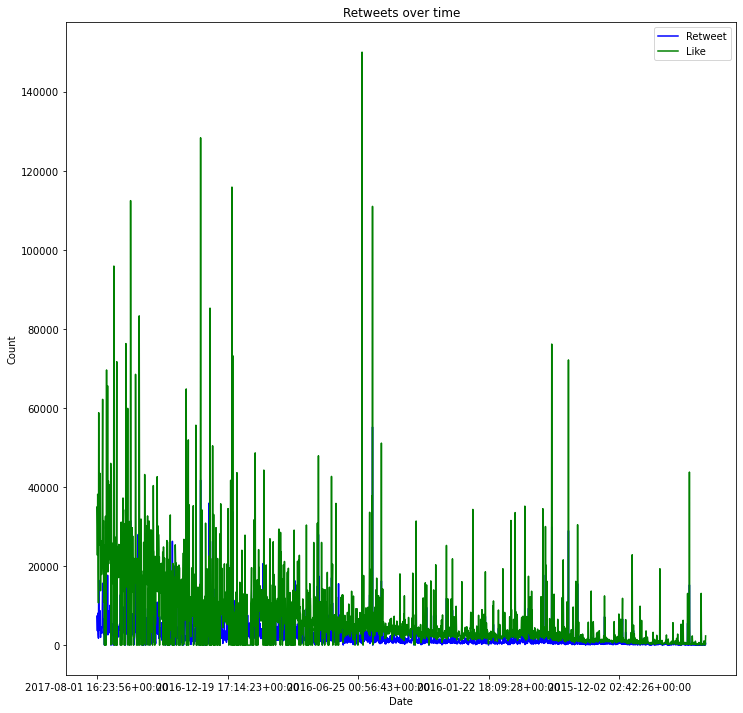

In [80]:
df_wrangle['retweet_count'].plot(color = 'blue', label= 'Retweet',figsize=(12,12))
df_wrangle['favorite_count'].plot(color = 'green', label= 'Like',figsize=(12,12))
plt.legend(loc = 'upper right')
plt.title('Retweets over time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('retweet_favortie.png')
plt.show()

#### - Retweets over time -- retweets increase over time

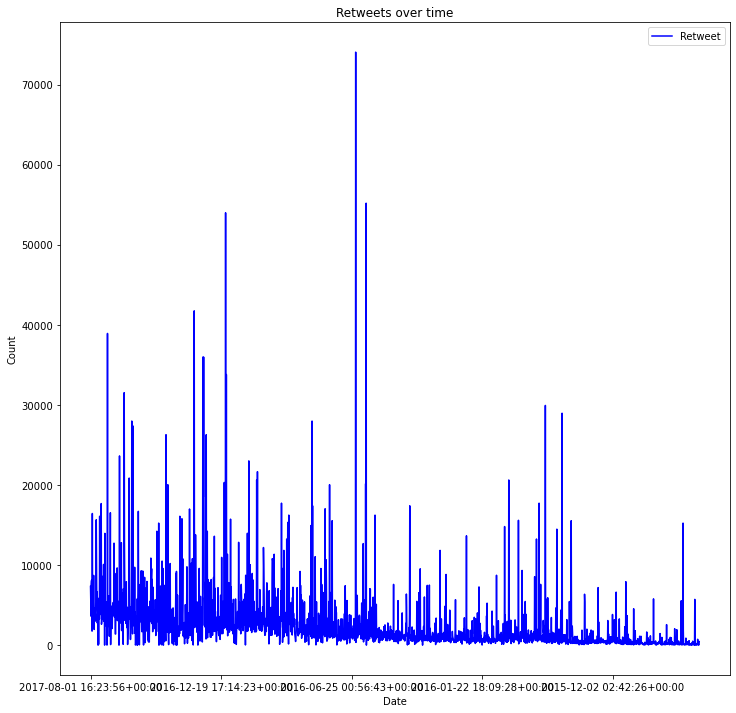

In [81]:
df_wrangle['retweet_count'].plot(color = 'blue', label= 'Retweet',figsize=(12,12))
plt.legend(loc = 'upper right')
plt.title('Retweets over time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('retweet_favortie.png')
plt.show()

#### - Likes increase over time -> the profile become more popular over time

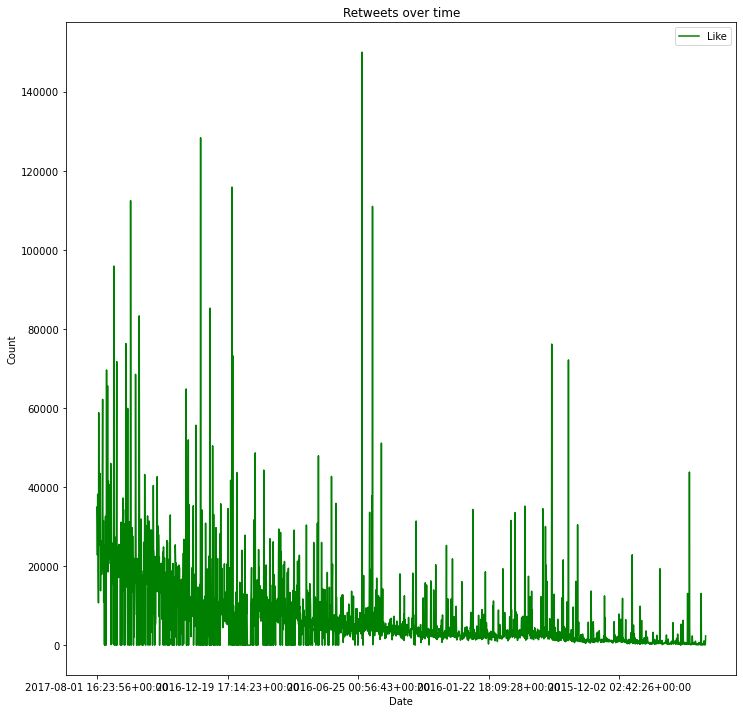

In [82]:
df_wrangle['favorite_count'].plot(color = 'green', label= 'Like',figsize=(12,12))
plt.legend(loc = 'upper right')
plt.title('Retweets over time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('retweet_favortie.png')
plt.show()

#### -  The relation between retweets and favorite counts are proportional - with the increase in the number of likes the retweets also increase

Text(0.5, 1.0, 'Retweets VS favorites Scatter plot')

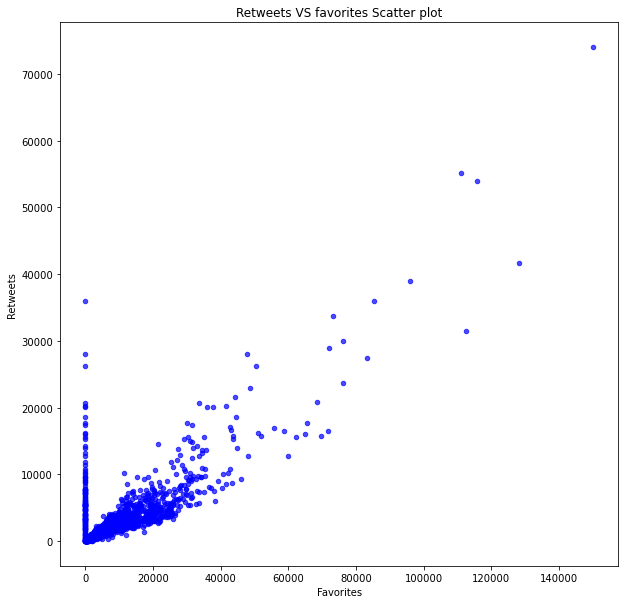

In [83]:
df_wrangle.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.7, figsize=(10,10), color='blue')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets VS favorites Scatter plot')

#### From the box plot we can assume that most dogs are in Puppo category but highest retweets are about doggo category

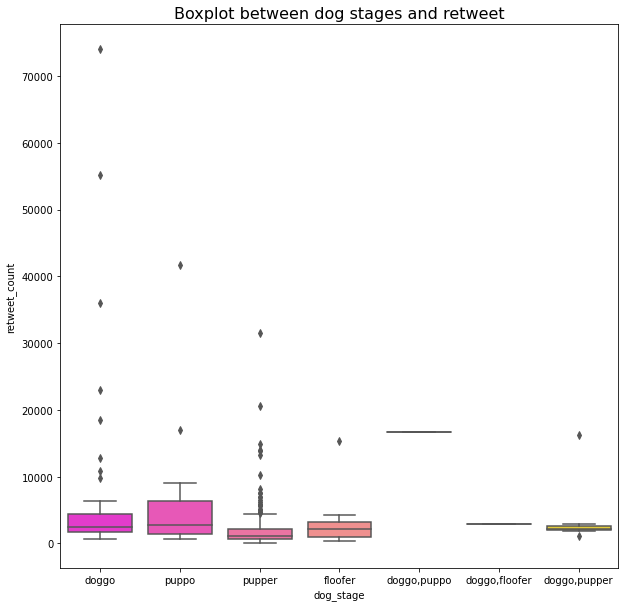

In [84]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x='dog_stage',y='retweet_count',data= df_wrangle,palette='spring')
g.axes.set_title('Boxplot between dog stages and retweet', fontsize=16);


### Conclusion:
Based on the above result:

- The count of Like higher than the Retweet and the account is becoming more popular over time.
- The count of favorite and Retweet have a strong relationship.With the increase of favorites the retweet also increase.
- Most dogs are in Puppo category but highest retweets are about doggo category